In [1]:
import numpy as np
import cv2
import imutils

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

from skimage import io
from matplotlib import pyplot as plt
from PIL import ImageEnhance, Image

from utils import cv2_imshow as imshow

In [2]:
[o1, o2, o3, o4, o5, o6] = [cv2.imread(f"images/obj{i}.jpg") for i in range(1, 7)]

In [3]:
def grabCut(image, rect, iterCount=5):
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
    return image * mask2[:, :, np.newaxis]

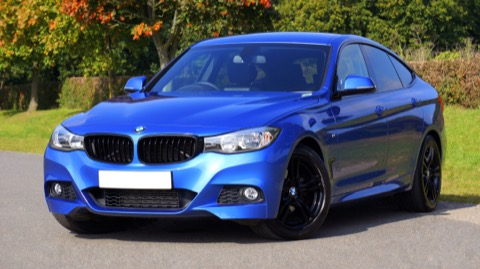

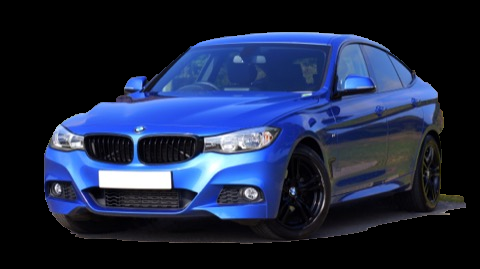

In [4]:
imshow(o1)
result1 = grabCut(o1, (30, 30, 440, 240), 10)
imshow(result1)

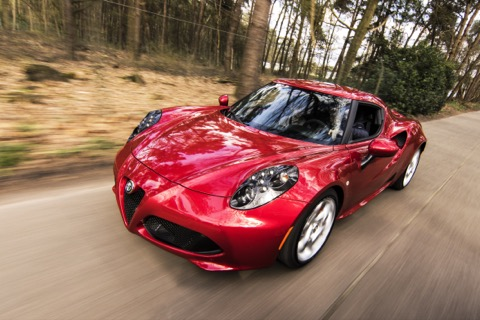

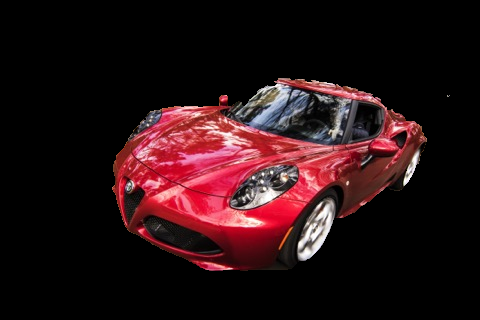

In [5]:
imshow(o2)
result2 = grabCut(o2, (40, 50, 440, 250), 20)
imshow(result2)

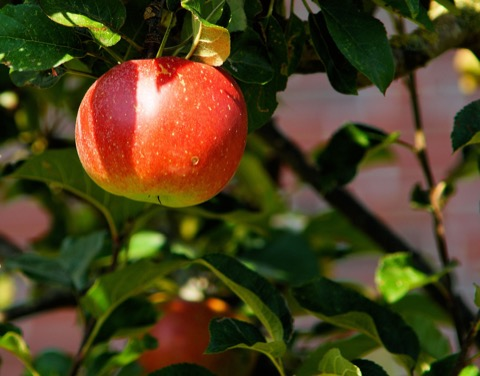

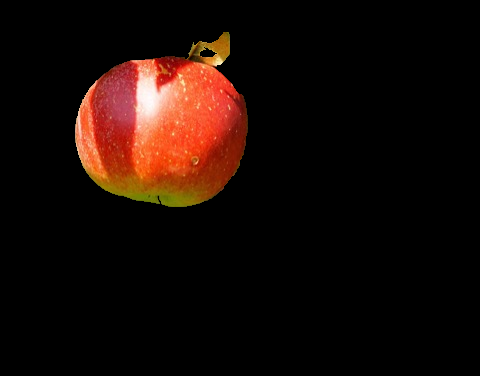

In [6]:
imshow(o3)
result3 = grabCut(o3, (30, 30, 250, 200), 5)
imshow(result3)

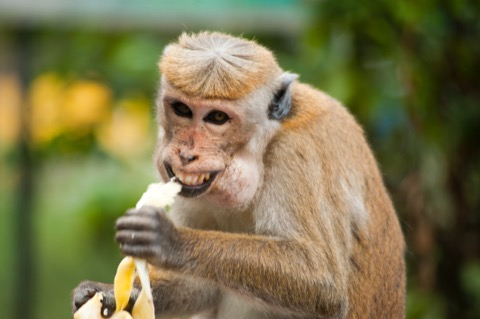

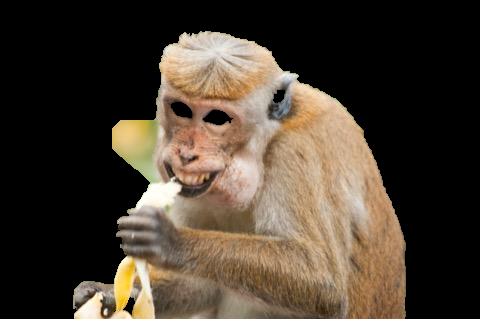

In [7]:
imshow(o4)
result4 = grabCut(o4, (40, 20, 400, 319), 10)
imshow(result4)

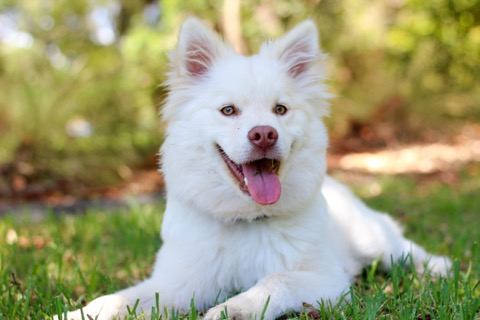

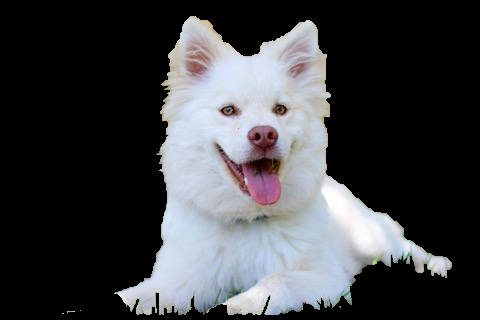

In [8]:
imshow(o5)
result5 = grabCut(o5, (25, 15, 440, 300), 25)
imshow(result5)

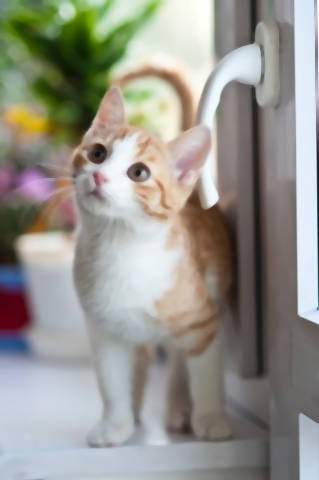

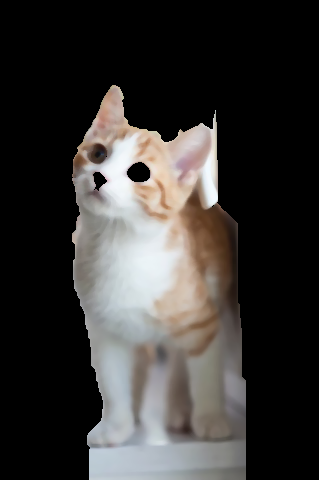

In [9]:
o6_blur = cv2.medianBlur(o6, 5)
imshow(o6_blur)
result6 = grabCut(o6_blur, (64, 82, 182, 400), 2)
imshow(result6)